Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print('hello,world')

hello,world


Load Dataset

In [2]:
df = pd.read_csv("./BodyFatMale.csv")
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Print Dataset

In [3]:
#SHAPE OF THE DATASET
df.shape

(252, 14)

In [4]:
#INFO ABOUT OUR ATTRIBUTES AND ITS DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [5]:
#ANALYSIS ON THE NUMERICAL COLUMNS
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,81.159484,1.782302,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,13.330848,0.093290,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,53.750000,0.750000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,72.125000,1.730000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,80.060000,1.780000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,89.360000,1.840000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
#CHECK FOR NULL VALUES
df.isnull().sum()

BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
#CHECK FOR DUPLICATES IN THE DATASET
df.duplicated().sum()

0

Text(0.5, 0.98, 'Visualizing Continuous Columns')

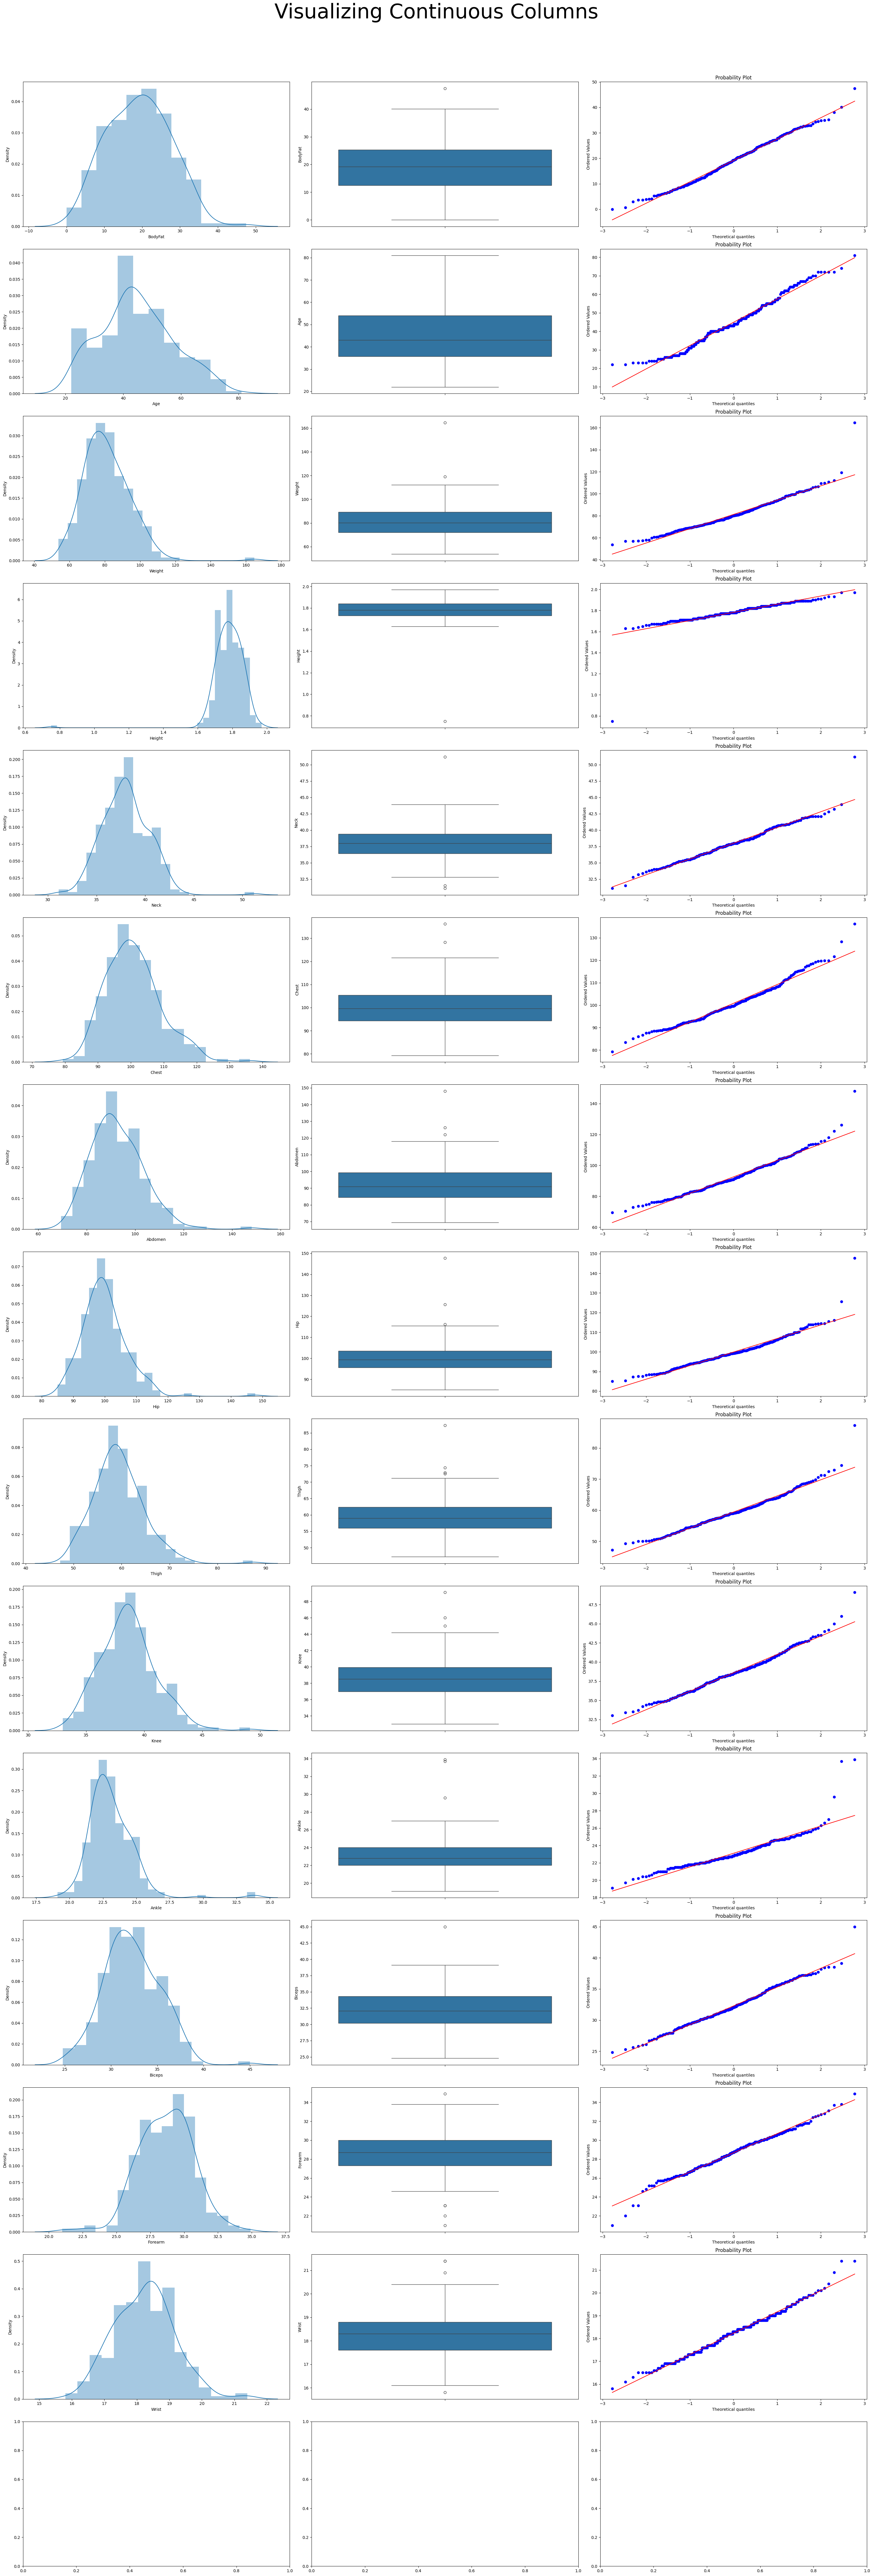

In [8]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [9]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.343292
Forearm   -0.219333
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205100
Hip        1.497127
Ankle      2.255134
dtype: float64


<Axes: >

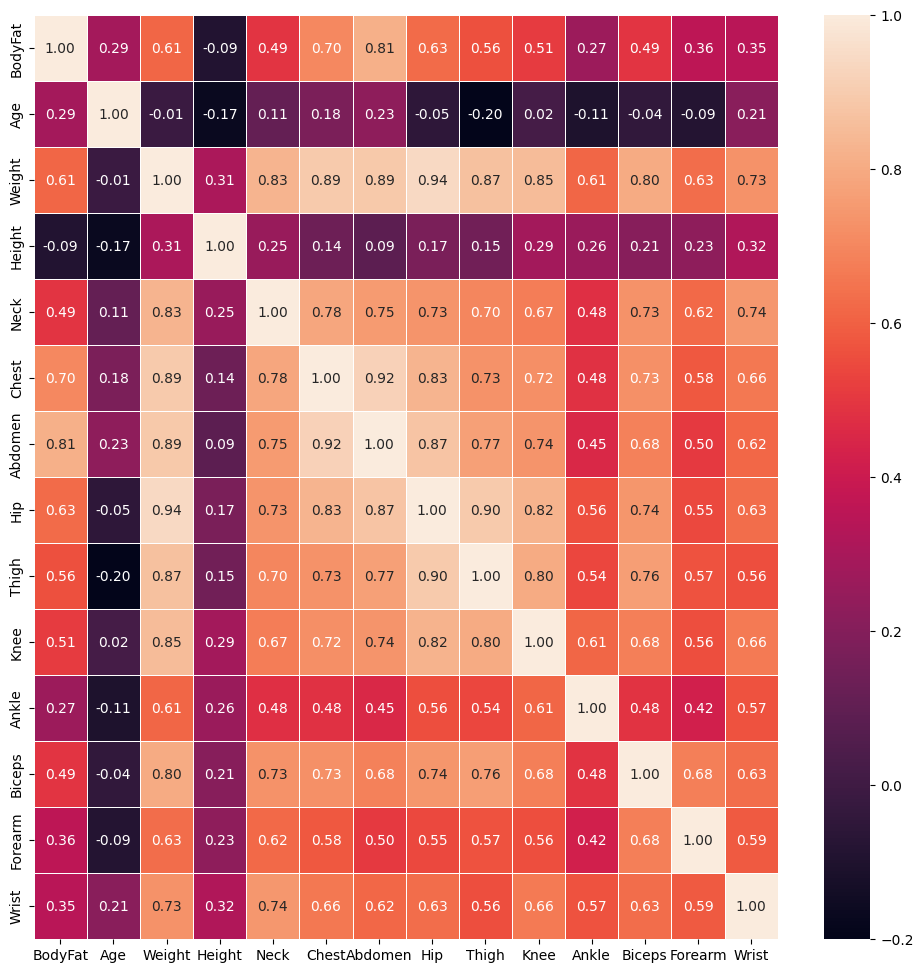

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [11]:
# SPLITING THE DATASET INTO TRAINING AND TESTING DATA
X = df.drop('BodyFat', axis=1)
y = df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 17.99585570013161
Mean Absolute Error (MAE): 3.3279986455030355
R-squared (R2) Score: 0.6131426838958927


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=200, random_state=60)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 14.369693848039233
Mean Absolute Error (MAE): 3.1866176470588257
R-squared (R2) Score: 0.6910943670631063


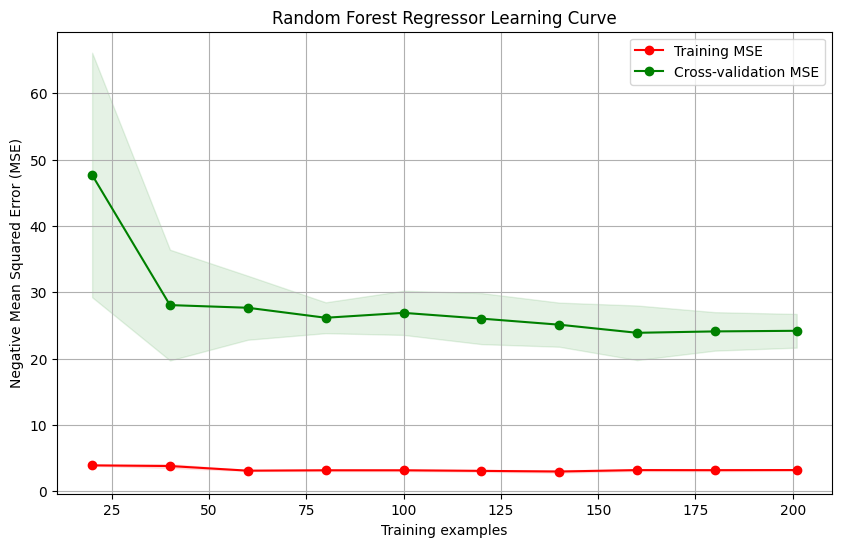

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_mean_squared_error'  # You can use other scoring functions like 'neg_mean_absolute_error'
)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create the learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Regressor Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error (MSE)")
plt.grid()

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")

plt.legend(loc="best")
plt.show()


Mean Squared Error (MSE): 18.67787897806415
Mean Absolute Error (MAE): 3.6350596970202873
R-squared (R2) Score: 0.5984812140987338


<Figure size 1000x600 with 0 Axes>

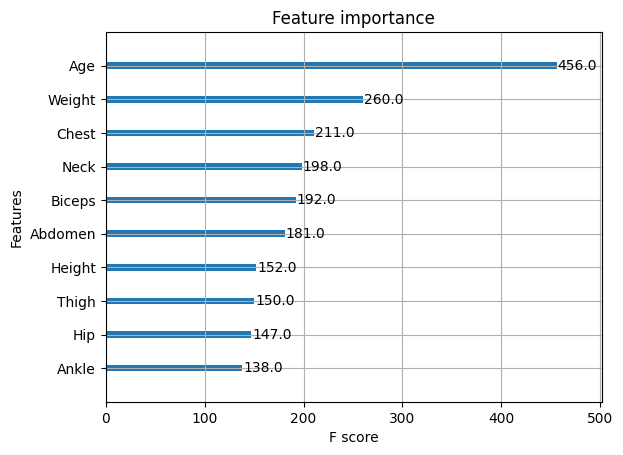

In [15]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create an XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=70)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Optionally, you can visualize feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()


Epoch 1/900
7/7 [==============================] - 2s 49ms/step - loss: 527.5000 - val_loss: 266.8095
Epoch 2/900
7/7 [==============================] - 0s 9ms/step - loss: 300.0243 - val_loss: 188.0376
Epoch 3/900
7/7 [==============================] - 0s 9ms/step - loss: 223.1515 - val_loss: 121.6935
Epoch 4/900
7/7 [==============================] - 0s 11ms/step - loss: 146.3249 - val_loss: 65.4925
Epoch 5/900
7/7 [==============================] - 0s 10ms/step - loss: 88.0086 - val_loss: 35.4070
Epoch 6/900
7/7 [==============================] - 0s 10ms/step - loss: 58.5394 - val_loss: 35.9434
Epoch 7/900
7/7 [==============================] - 0s 10ms/step - loss: 56.3813 - val_loss: 44.2987
Epoch 8/900
7/7 [==============================] - 0s 10ms/step - loss: 57.4810 - val_loss: 40.6615
Epoch 9/900
7/7 [==============================] - 0s 8ms/step - loss: 54.8590 - val_loss: 35.8098
Epoch 10/900
7/7 [==============================] - 0s 11ms/step - loss: 53.4093 - val_loss: 33.

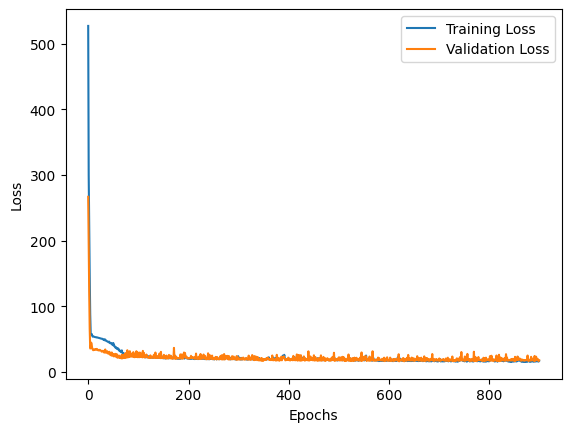

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Sequential model
model = Sequential()

# Add input and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Add three additional hidden layers
model.add(Dense(16, activation='relu'))  # Additional hidden layer 1
model.add(Dense(8, activation='relu'))   # Additional hidden layer 2
# model.add(Dense(4, activation='relu'))   # Additional hidden layer 3

# Add the output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Use mean squared error for regression

# Train the model
history = model.fit(X_train, y_train, epochs=900, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel ('Epochs')
plt.ylabel('Loss')
plt.show()


Mean Squared Error (MSE): 19.47267046708588
Mean Absolute Error (MAE): 3.4317416625825956
R-squared (R2) Score: 0.5813955635229133


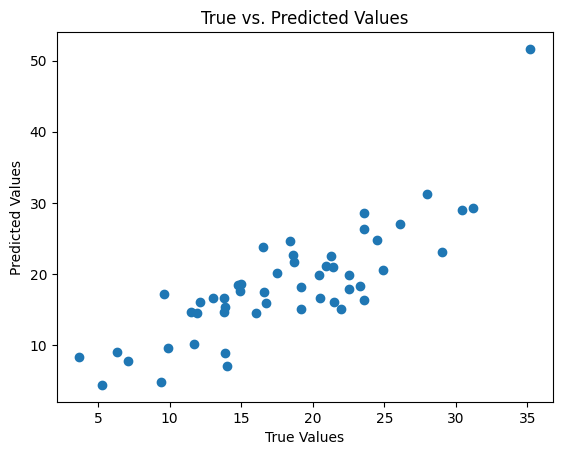

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an SVR model
model = SVR(kernel='linear', C=1.0, epsilon=0.2)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

Mean Squared Error (MSE): 329.8940761457564
Mean Absolute Error (MAE): 16.809837423585346
R-squared (R2) Score: -6.091740399733146


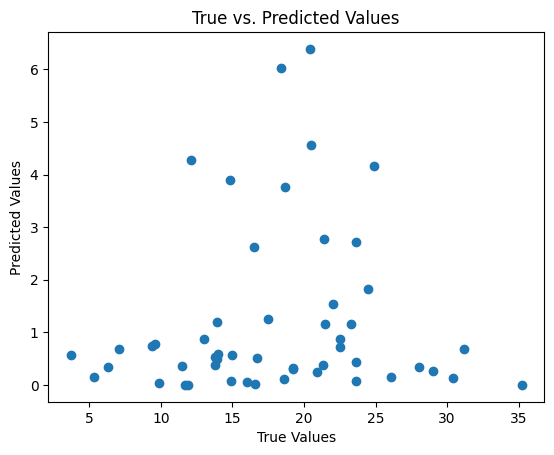

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a KernelRidge model
model = KernelRidge(kernel='rbf', alpha=1.0)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot the true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()


In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Lasso regression model
model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 19.278153571392796
Mean Absolute Error (MAE): 3.4792914466087232
R-squared (R2) Score: 0.5855770976193542


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=200, random_state=60)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 14.369693848039233
Mean Absolute Error (MAE): 3.1866176470588257
R-squared (R2) Score: 0.6910943670631063


In [21]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a LightGBM regression model
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 13
[LightGBM] [Info] Start training from score 19.435821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=200, random_state=60)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=200, random_state=60)),
    ('SVR', SVR(kernel='linear')),
]

# Define the meta model (the model that combines base models' predictions)
meta_model = LinearRegression()

# Create a StackingRegressor with base and meta models
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred = stacking_model.predict(X_test)

# Evaluate the stacking model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 17.849490636313206
Mean Absolute Error (MAE): 3.3300503601980633
R-squared (R2) Score: 0.7802931167630933


In [28]:
import pickle

# Save the stacking model to a pickle file
with open('stacking_model.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)

In [29]:
# Load the stacking model from the pickle file (for future use)
with open('stacking_model.pkl', 'rb') as file:
    loaded_stacking_model = pickle.load(file)

In [33]:
# Test the loaded model on new inputs
new_inputs = [[23, 100.97, 1.72, 36.2, 93.1, 85.2, 94.5, 59, 37.3, 21.9, 32, 27.4, 17.1]]  # Replace with your new input data
predictions = loaded_stacking_model.predict(new_inputs)

# Print the predictions
print("Predictions:", predictions)

Predictions: [15.53838502]
